<a href="https://colab.research.google.com/github/sitikharomah/Tugas-Besar-DL/blob/main/%5B2%5D%22Implementasi_Convolutional_Neural_Network_(CNN)_dalam_Megklasifikasi_kelas_hama_pada_selada_menggunakan_arsitektur_DenseNet_dan_EfficientNet%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import DenseNet121, EfficientNetB0
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# PERSIAPAN DATA

In [ ]:
data_dir = "/content/drive/MyDrive/DATASET SELADA"  # Folder utama berisi 3 folder kelas
img_size = 224
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 783 images belonging to 3 classes.
Found 194 images belonging to 3 classes.


# MODEL DENSENET121

In [ ]:
base_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_densenet.trainable = False

model_densenet = Sequential([
    base_densenet,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model_densenet.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining Model DenseNet121")
model_densenet.fit(train_gen, epochs=50, validation_data=val_gen)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

Training Model DenseNet121


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 828s 17s/step - accuracy: 0.4697 - loss: 1.0763 - val_accuracy: 0.8351 - val_loss: 0.5546
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 229s 5s/step - accuracy: 0.8502 - loss: 0.4618 - val_accuracy: 0.8711 - val_loss: 0.3758
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 224s 5s/step - accuracy: 0.9150 - loss: 0.2850 - val_accuracy: 0.9021 - val_loss: 0.2821
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 225s 5s/step - accuracy: 0.9399 - loss: 0.2278 - val_accuracy: 0.9330 - val_loss: 0.2405
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 269s 6s/step - accuracy: 0.9609 - loss: 0.1579 - val_accuracy: 0.8866 - val_loss: 0.2355
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 227s 5s/step - accuracy: 0.9501 - loss: 0.1561 - val_accuracy: 0.8763 - val_loss: 0.2318
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 270s 5s/step - accuracy: 0.9540 - loss: 0.1300 - val_accuracy: 0.8918 - val_loss: 0.2125
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 231s 5s/step - accuracy: 0.9741 - loss: 0.0914 - val_accuracy: 0.9072 - 

In [ ]:
base_densenet.summary()

Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,037,504 (26.85 MB)

# MODEL EFFICIENTNETB0

In [ ]:
base_efficientnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_efficientnet.trainable = False

model_efficientnet = Sequential([
    base_efficientnet,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model_efficientnet.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining Model EfficientNetB0")
model_efficientnet.fit(train_gen, epochs=50, validation_data=val_gen)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Training Model EfficientNetB0
Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.3543 - loss: 1.1168 - val_accuracy: 0.3505 - val_loss: 1.1093
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.2893 - loss: 1.1226 - val_accuracy: 0.3505 - val_loss: 1.1028
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.3215 - loss: 1.1132 - val_accuracy: 0.3505 - val_loss: 1.0998
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.3196 - loss: 1.1096 - val_accuracy: 0.3505 - val_loss: 1.1031
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.3501 - loss: 1.1026 - val_accuracy: 0.3402 - val_loss: 1.0978
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.3568 - loss: 1.0998 - val_accuracy: 0.3402 - val_loss: 1.0977
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.3795 - loss: 1.0946 - val_accuracy: 0.3402 - val_loss: 1.0980
Epoch 8/50
49/49 ━━━━━━━━━━━━

In [ ]:
base_efficientnet.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

# VISUALISASI KELAS

In [ ]:
class_labels = list(train_gen.class_indices.keys())

print("\nKelas yang terdeteksi:")
for label, index in train_gen.class_indices.items():
    print(f"{index}: {label}")


Kelas yang terdeteksi:
0: BUSUK_AKAR
1: BUSUK_BATANG
2: MATA_KODOK


# CONFUSION MATRIX & KLASIFIKASI

EfficientNetB0

13/13 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step

Classification Report (EfficientNetB0):
              precision    recall  f1-score   support

  BUSUK_AKAR       0.00      0.00      0.00        66
BUSUK_BATANG       0.00      0.00      0.00        60
  MATA_KODOK       0.35      1.00      0.52        68

    accuracy                           0.35       194
   macro avg       0.12      0.33      0.17       194
weighted avg       0.12      0.35      0.18       194



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


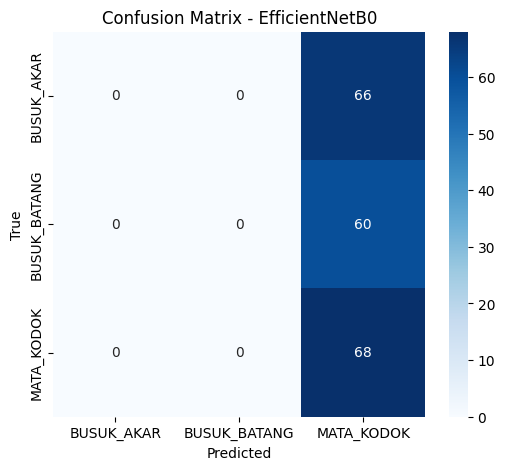

In [ ]:
# EfficientNetB0
pred_efficientnet = model_efficientnet.predict(val_gen)
y_true = val_gen.classes
y_pred = np.argmax(pred_efficientnet, axis=1)

print("\nClassification Report (EfficientNetB0):")
print(classification_report(y_true, y_pred, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - EfficientNetB0')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


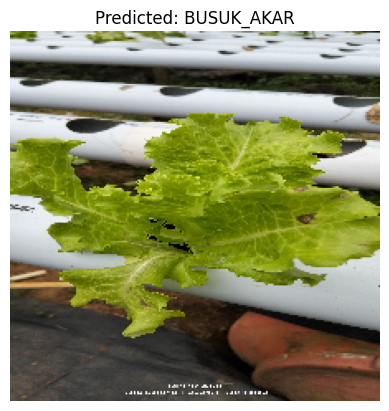

In [ ]:
predict_image("model_efficientnet_selada.h5", "/content/drive/MyDrive/DATASET SELADA/MATA_KODOK/IMG20241130165217.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


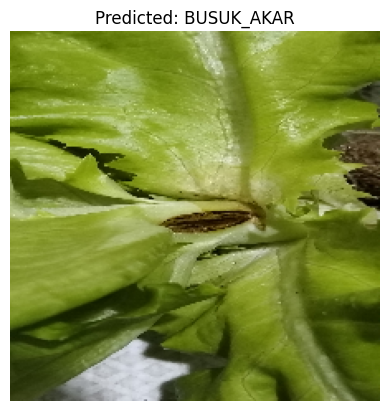

In [ ]:
predict_image("model_efficientnet_selada.h5", "/content/drive/MyDrive/DATASET SELADA/BUSUK_BATANG/IMG20250115214419.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


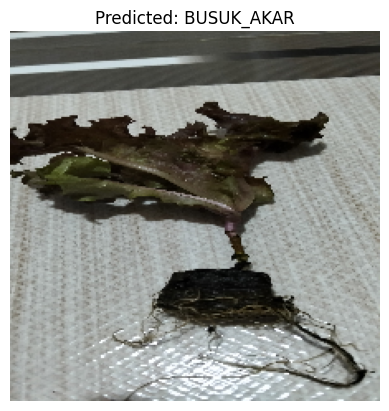

In [ ]:
predict_image("model_efficientnet_selada.h5", "/content/drive/MyDrive/DATASET SELADA/BUSUK_AKAR/IMG20250115204103.jpg")


13/13 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step

Classification Report (DenseNet121):
              precision    recall  f1-score   support

  BUSUK_AKAR       0.99      1.00      0.99        66
BUSUK_BATANG       1.00      0.87      0.93        60
  MATA_KODOK       0.89      0.99      0.94        68

    accuracy                           0.95       194
   macro avg       0.96      0.95      0.95       194
weighted avg       0.96      0.95      0.95       194



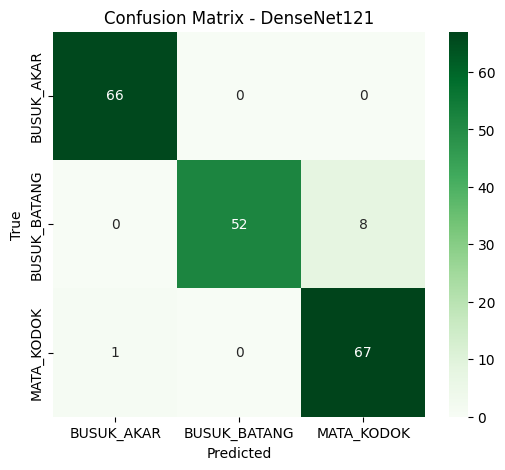

In [ ]:
# DenseNet121
pred_densenet = model_densenet.predict(val_gen)
y_pred_densenet = np.argmax(pred_densenet, axis=1)

print("\nClassification Report (DenseNet121):")
print(classification_report(y_true, y_pred_densenet, target_names=class_labels))

cm2 = confusion_matrix(y_true, y_pred_densenet)
plt.figure(figsize=(6,5))
sns.heatmap(cm2, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - DenseNet121')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


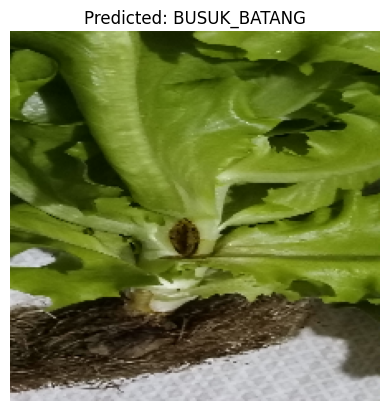

In [ ]:
predict_image("model_densenet_selada.h5", "/content/drive/MyDrive/DATASET SELADA/BUSUK_BATANG/IMG20250115214851_01.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


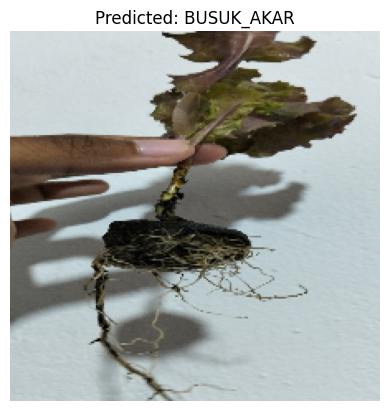

In [ ]:
predict_image("model_densenet_selada.h5", "/content/drive/MyDrive/DATASET SELADA/BUSUK_AKAR/IMG20250115203907.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


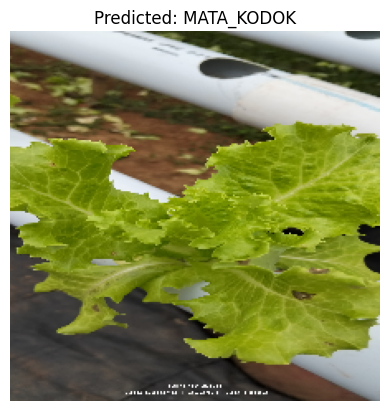

In [ ]:
predict_image("model_densenet_selada.h5", "/content/drive/MyDrive/DATASET SELADA/MATA_KODOK/IMG20241130165243.jpg")


# SIMPAN MODEL

In [ ]:
model_densenet.save("model_densenet_selada.h5")
model_efficientnet.save("model_efficientnet_selada.h5")

# PREDIKSI CITRA TUNGGAL

In [ ]:
def predict_image(model_path, image_path):
    model = load_model(model_path)
    img = load_img(image_path, target_size=(img_size, img_size))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()